# Problem 1

Derivation for update rule

Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural network with backpropagation for regression using the Mean Square Error loss. Assume that you are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different from the update rule for the network trained for binary classification using log loss.

Input Layer (A[0]): X Features
Hidden Layer (A[1]): Z[1], W_1, B_1, Sigmoid Activation σ() = 1/1+e^-z
Output Layer (A[2]): Z[2], W_2, B_2,
Cost: MSE = (Prediction - True)^2 = (A[2] - y)^2


---


Forward Propagation:

Input Layer --> Hidden Layer: Z[1] = W_1 * A[0] + B_1
<br>
Sigmoid Activation: A[1] = σ(Z[1])

Hidden Layer --> Output Layer: Z[2] = W_2 * A[1] + B_2
<br>
Output: A[2] = Z[2] = y_hat

Cost: L = (y_hat - y)^2


---


Backpropagation:

For 2 layers, that means 2 parameters per layer to optimize, W_2, B_2, W_1, B_1.
Each of the weights and biases need to be updated using its gradients. This means using the chain rule to obtain the partial derivatives of each parameter. This allows the model to determine how each parameter impacts the cost individually.

Here are the following gradients we need to compute:

$$\frac{\partial L}{\partial W_2}, \quad \frac{\partial L}{\partial B_2}, \quad \frac{\partial L}{\partial W_1}, \quad \frac{\partial L}{\partial B_1}$$
<br><br>
Term Functions:
$$L = 1/2 * (A[2] - y)^2$$
$$A[2] = Z[2]$$
$$Z[2] = W_2 * A[1] + B_2$$
$$A[1] = \sigma(Z[1]) = \frac{1}{1 + e^{-x}}$$
$$Z[1] = W_1 * A[0] + B_1$$
$$A[0] = X$$
<br><br>
Partial Derivative of W_2:
$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial A[2]} * \frac{\partial A[2]}{\partial Z[2]} * \frac{\partial Z[2]}{\partial W_2}$$
<br><br>
$$\frac{\partial L}{\partial A[2]} = A[2] - y$$
$$\frac{\partial A[2]}{\partial Z[2]} = 1$$
$$\frac{\partial Z[2]}{\partial W_2} = A[1] $$
<br>
$$\frac{\partial L}{\partial W_2} = (A[2] - y) * 1 * A[1] = (A[2] - y)A[1]$$
<br><br>
Partial Derivative of B_2:
$$\frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial A[2]} * \frac{\partial A[2]}{\partial Z[2]} * \frac{\partial Z[2]}{\partial B_2}$$
<br>
$$\frac{\partial Z[2]}{\partial B_2} = 1$$
<br>
$$\frac{\partial L}{\partial B_2} = (A[2] - y) * 1 * 1 = A[2] - y$$
<br><br>
Partial Derivative of W_1:
$$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial A[2]} * \frac{\partial A[2]}{\partial Z[2]} * \frac{\partial Z[2]}{\partial A[1]} * \frac{\partial A[1]}{\partial Z[1]} * \frac{\partial Z[1]}{\partial W_1}$$
<br>
$$\frac{\partial Z[2]}{\partial A[1]} = W_2$$
$$\frac{\partial A[1]}{\partial Z[1]} = A[1]*(1-A[1])$$
$$\frac{\partial Z[1]}{\partial W_1} = A[0] = X$$
<br>
$$\frac{\partial L}{\partial W_1} = (A[2] - y) * 1 * W_2 * A[1](1-A[1]) * X$$
<br><br>
Partial Derivative of B_1:
$$\frac{\partial L}{\partial B_1} = \frac{\partial L}{\partial A[2]} * \frac{\partial A[2]}{\partial Z[2]} * \frac{\partial Z[2]}{\partial A[1]} * \frac{\partial A[1]}{\partial Z[1]} * \frac{\partial Z[1]}{\partial B_1}$$
<br>
$$\frac{\partial Z[1]}{\partial B_1} = 1$$
<br><br>
$$\frac{\partial L}{\partial B_1} = (A[2] - y) * 1 * W_2 * A[1](1-A[1]) * 1$$


---

Updating the weights and biases:

$$W_1new = W_1 - α*\frac{\partial L}{\partial W_1} ,\quad  B_1new = B_1 - α*\frac{\partial L}{\partial B_1}$$

$$W_2new = W_2 - α*\frac{\partial L}{\partial W_2} ,\quad  B_2new = B_2 - α*\frac{\partial L}{\partial B_2}$$


---

Comparing with binary classification using log loss:

The output of binary classificaiton uses a sigmoid activation function instead of the linear used in the MSE. The gradients are relatively similar, with the main difference being the sigmoid activation on Z[2]. When computing the gradients using the chain rule, since the log loss uses a sigmoid activation, the y_hat values will be different. Since the prediciton values are different, the loss willbe calculated differently, thus weights are updated differently. The values of each prediction are also very different, with binary classificaiton, the sigmoid bounds the prediciton value between 0 and 1, while regression based cost functions like MSE is unbounded.
















# Problem 2
Implementing Neural Network

### Processing and building architecture

In [7]:
import numpy as np
# Loading CSV files

X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
X_test = np.loadtxt('X_test.csv')
y_test = np.loadtxt('Y_test.csv')

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (100, 2)
Shape of y_train: (100,)
Shape of X_test: (50, 2)
Shape of y_test: (50,)


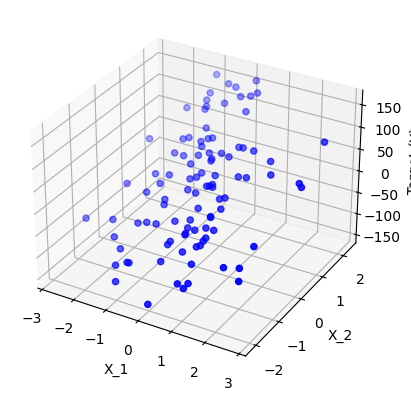

In [14]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the data
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='blue', marker='o')
# Add labels
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Target (Y)')

plt.show()
plt.close()

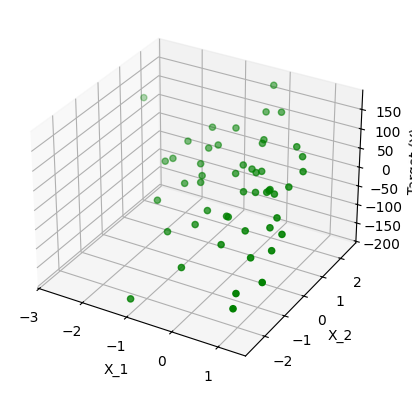

In [16]:
# Create a 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the data
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='green', marker='o')
# Add labels
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Target (Y)')

plt.show()
plt.close()

In [32]:
# Checking architecture
n = [2 , 4, 1] # size per layer

# Initializing weights and bias
W1 = np.random.randn(n[1], n[0])
B1 = np.random.randn(n[1], 1)
W2 = np.random.randn(1, n[1])
B2 = np.random.randn(1, 1)

# Print shape of each weight
print(f"Shape of W1: {W1.shape}")
print(f"Shape of B1: {B1.shape}")
print(f"Shape of W2: {W2.shape}")
print(f"Shape of B2: {B2.shape}")

Shape of W1: (4, 2)
Shape of B1: (4, 1)
Shape of W2: (1, 4)
Shape of B2: (1, 1)


In [28]:
A0 = X_train.T
print(f"Shape of A0: {A0.shape}")
y = y_train.reshape(1, -1)
print(f"Shape of y: {y.shape}")

Shape of A0: (2, 100)
Shape of y: (1, 100)


In [29]:
def sigmoid(arr):
  return 1 / (1+np.exp(-1 * arr))

In [41]:
# Input Layer to Hidden Layer Calculations
Z1 = W1 @ A0 + B1
A1 = sigmoid(Z1)

print(f"Shape of Z1: {Z1.shape}")
print(f"Shape of A1: {A1.shape}")

# Hidden Layer to Output Layer Calculations
Z2 = W2 @ A1 + B2
A2 = Z2
print(f"Shape of A2: {A2.shape}")
print(Z2)
y_hat = A2

Shape of Z1: (4, 100)
Shape of A1: (4, 100)
Shape of A2: (1, 100)
[[-1.00865568 -0.95838615 -1.52421862 -1.67292842 -0.41946957 -1.8809468
  -0.94747707 -1.27368285 -0.89666411 -0.71003934 -1.07878314 -0.58109986
  -0.87271655 -0.33657761 -2.32537935 -1.59423377 -0.8466144  -1.29205474
  -1.63163138 -1.93467685 -0.68299255 -0.90886132 -0.56743629 -0.62232517
  -1.77427045 -1.2896973  -2.24844191 -1.69234052 -1.32636896 -2.31573515
  -1.70698713 -1.62612322 -1.37727583 -0.64657558 -0.63922663 -0.68267502
  -1.02140695 -1.4157624  -0.52598948 -2.21705039 -1.03771164 -1.32866587
  -0.73267252 -1.15509474 -0.46453552 -1.43502955 -1.3099634  -0.59428062
  -1.65600165 -1.10586736 -1.73999501 -0.50046389 -1.61178706 -1.18242492
  -1.08756939 -0.64827378 -0.6869073  -1.50091346 -1.81390626 -1.43800049
  -0.99142354 -1.6311327  -0.27429658 -0.84782709 -0.54071049 -0.64536201
  -0.74417197 -1.04695055 -1.45338713 -1.65293287 -0.83244018 -1.15705328
  -1.69409705 -2.32681367 -1.21658275 -1.663229

In [36]:
# Calculate Error:
def mse_cost(y, y_hat):
  return np.mean((y_hat - y)**2)

cost = mse_cost(y, y_hat)
print(f"Cost: {cost}")

Cost: 5734.957123692159


In [142]:
# Backpropagation

# Output to Hidden Layer
dJ_dA2 = 2/100 * (y_hat - y)
dA2_dW2 = A1
dJ_dW2 = dJ_dA2 @ dA2_dW2.T
dJ_dB2 = np.sum(dJ_dW2, axis=1, keepdims=True)
print(f"Shape of dJ_dA2: {dJ_dA2.shape}")
print(f"Shape of dA2_dW2: {dA2_dW2.shape}")
print(f"Shape of dJ_dW2: {dJ_dW2.shape}")
print(f"Shape of dJ_dB2: {dJ_dB2.shape}")

# Hidden Layer to Input Layer
dZ2_dA1 = W2.T
dA1_dZ1 = A1 * (1 - A1)
dZ1_W1 = A0
print(f"Shape of dZ2_dA1: {dZ2_dA1.shape}")
print(f"Shape of dA1_dZ1: {dA1_dZ1.shape}")
print(f"Shape of dZ1_W1: {dZ1_W1.shape}")
dJ_dW1 = ((dZ2_dA1 @ dJ_dA2) * dA1_dZ1) @ dZ1_W1.T / 100
dJ_dB1 = np.sum(dJ_dW1, axis=1, keepdims=True) / 100

print(f"Shape of dJ_dW1: {dJ_dW1.shape}")
print(f"Shape of dJ_dB1: {dJ_dB1.shape}")

print(f"W1: {W1}")
print(f"W2: {W2}")
print(f"B1: {B1}")
print(f"B2: {B2}")


Shape of dJ_dA2: (1, 100)
Shape of dA2_dW2: (4, 100)
Shape of dJ_dW2: (1, 4)
Shape of dJ_dB2: (1, 1)
Shape of dZ2_dA1: (4, 1)
Shape of dA1_dZ1: (4, 100)
Shape of dZ1_W1: (2, 100)
Shape of dJ_dW1: (4, 2)
Shape of dJ_dB1: (4, 1)
W1: [[-1.39107941e+12  1.79295059e+12]
 [ 4.49654572e+10  9.88240445e+11]
 [ 3.23907926e-01  1.84564581e-01]
 [-4.61659788e+11  1.85502968e+12]]
W2: [[-3.77435643e+07 -7.42084164e+07 -1.38149812e+08 -7.44199844e+07]]
B1: [[ 4.76881257e+12]
 [ 9.46041029e+12]
 [-8.75925074e-02]
 [ 1.04244682e+13]]
B2: [[-1.42670694e+08]]


## Neural Network Class

In [277]:
import numpy as np
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(hidden_size, input_size)
        self.B1 = np.random.randn(hidden_size, 1)
        self.W2 = np.random.randn(output_size, hidden_size)
        self.B2 = np.random.randn(output_size, 1)
        self.cost_history = []

    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
          y_hat, Z2, A1 = self.feed_forward(X)
          cost = self.mse_cost(y, y_hat)
          self.cost_history.append(cost)
          dW1, dB1, dW2, dB2 = self.back_propagation( X, y_hat,y, Z2, A1)
          self.W1 -= learning_rate * dW1
          self.B1 -= learning_rate * dB1
          self.W2 -= learning_rate * dW2
          self.B2 -= learning_rate * dB2
          if i % 1000 == 0:
            print(f"Epoch: {i}, Cost: {cost}")
          elif i == epochs - 1:
            print(f"Final Epoch: {i}, Cost: {cost}")

        print(f"Final Weights: W1: {self.W1}, B1: {self.B1}, W12: {self.W2}, B2: {self.B2}")
        plt.plot(self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()
        plt.close()
        return self.W1, self.B1, self.W2, self.B2
    def feed_forward(self,A0):
        # Input Layer to Hidden Layer Calculations
        Z1 = self.W1 @ A0 + self.B1
        A1 = self.sigmoid(Z1)

        # Hidden Layer to Output Layer Calculations
        Z2 = self.W2 @ A1 + self.B2
        # A2 = relu(Z2)
        A2 = Z2
        y_hat = A2
        return y_hat, Z2, A1

    def mse_cost(self,y, y_hat):
        return np.mean((y_hat - y)**2)

    def sigmoid(self,arr):
        return 1 / (1+np.exp(-1 * arr))

    def sigmoid_derivative(self,x):
        return x * (1 - x)

    def relu(self,arr):
        return np.maximum(0, arr)

    def relu_derivative(self,x):
        return (x > 0).astype(float)


    def mse_loss_with_l2(self, y_true, y_pred, W1, W2, lambda_l2):
        mse_cost = self.mse_cost(y_true, y_pred)
        l2_penalty = (lambda_l2 / 2) * (np.sum(W1**2) + np.sum(W2**2))
        return mse_cost + l2_penalty


    def back_propagation(self, X, y_hat,y, Z2, A1):
        dZ2 = y_hat - y
        dW2 = (1/100) * dZ2 @ A1.T
        dB2 = (1/100) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = self.W2.T @ dZ2
        dZ1 = dA1 * self.sigmoid_derivative(A1)
        dW1 = (1/100) * dZ1 @ X.T
        dB1 = (1/100) * np.sum(dZ1, axis=1, keepdims=True)

        return dW1, dB1, dW2, dB2


Epoch: 0, Cost: 5705.321292162407
Epoch: 1000, Cost: 72.88031585034338
Epoch: 2000, Cost: 21.31045903292059
Epoch: 3000, Cost: 11.608097756888608
Epoch: 4000, Cost: 7.688642299770825
Final Epoch: 4999, Cost: 5.6064309537819375
Final Weights: W1: [[ 1.00865034e-02 -4.36373453e+00]
 [-9.54830207e-04  3.58726298e+00]
 [-2.99167186e-02 -3.77334642e+00]
 [ 1.88588350e-02  4.37298658e+00]], B1: [[-6.03489636]
 [-2.08251983]
 [-1.57954332]
 [-7.17824155]], W12: [[-68.85698186  74.49395347 -68.66768384  75.75197572]], B2: [[4.11224133]]


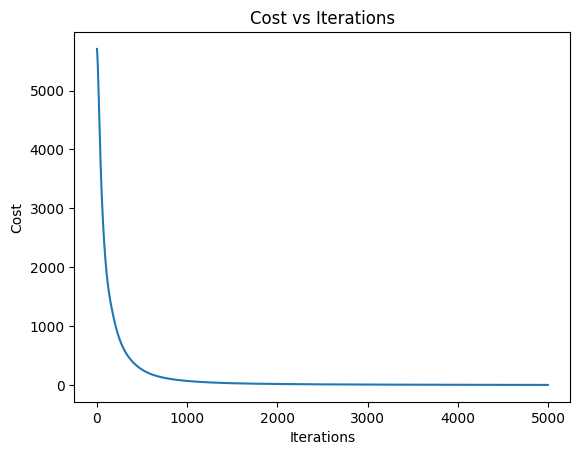

Final Weights: W1: [[ 1.00865034e-02 -4.36373453e+00]
 [-9.54830207e-04  3.58726298e+00]
 [-2.99167186e-02 -3.77334642e+00]
 [ 1.88588350e-02  4.37298658e+00]], B1: [[-6.03489636]
 [-2.08251983]
 [-1.57954332]
 [-7.17824155]], W12: [[-68.85698186  74.49395347 -68.66768384  75.75197572]], B2: [[4.11224133]]


In [240]:
# Learning Rate 0.001, Epochs 10000
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn = NeuralNetwork(2, 4, 1)
W1,B1,W2,B2 = nn.train(A0, y, 5000, 0.01)
print(f"Final Weights: W1: {W1}, B1: {B1}, W12: {W2}, B2: {B2}")

X_test = np.loadtxt('X_test.csv')
X_test = X_test.T
y_test = np.loadtxt('Y_test.csv')
y_test = y_test.reshape(1, -1)


Test MSE: 991.5218219515444


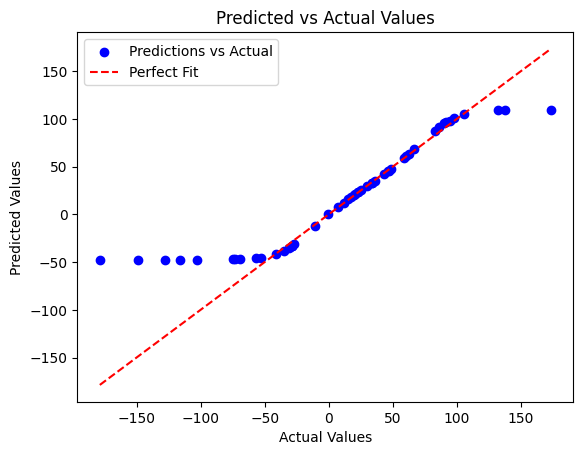

In [254]:
def predict(X_test, W1, B1, W2, B2):
    # Forward pass
    Z1 = W1 @ X_test + B1
    A1 = sigmoid(Z1)  # Hidden layer activation

    Z2 = W2 @ A1 + B2
    A2 = Z2  # Linear activation for regression output

    return A2  # Predicted values

# Load and preprocess X_test and Y_test
X_test = np.loadtxt('X_test.csv').T  # Ensure correct shape
Y_test = np.loadtxt('Y_test.csv').reshape(1, -1)  # Ensure correct shape
# Make predictions
Y_pred = predict(X_test, W1, B1, W2, B2)

# Compute Mean Squared Error
test_mse = mse_cost(Y_test, Y_pred)

print(f"Test MSE: {test_mse}")


import matplotlib.pyplot as plt

plt.scatter(Y_test.flatten(), Y_pred.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()


Epoch: 0, Cost: 5515.485771605152
Epoch: 1000, Cost: 1990.9466688546227
Epoch: 2000, Cost: 1039.9393603080516
Epoch: 3000, Cost: 603.9741096979351
Epoch: 4000, Cost: 389.912689751636
Final Epoch: 4999, Cost: 265.4337209269019
Final Weights: W1: [[-0.02558758  5.47436445]
 [ 0.01280334  4.61011991]
 [ 0.06288477 -5.07513682]
 [-0.12945482 -4.6942573 ]], B1: [[-5.86833758]
 [-1.98965865]
 [-3.73987486]
 [-1.57626073]], W12: [[ 51.86032851  51.08449303 -42.07934324 -42.58537405]], B2: [[3.36937672]]


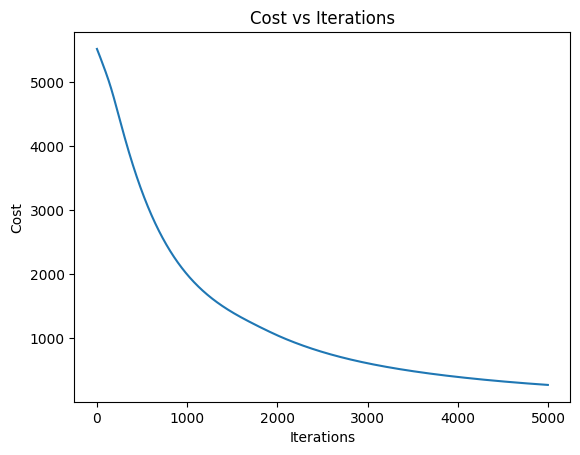

Final Weights: W1: [[-0.02558758  5.47436445]
 [ 0.01280334  4.61011991]
 [ 0.06288477 -5.07513682]
 [-0.12945482 -4.6942573 ]], B1: [[-5.86833758]
 [-1.98965865]
 [-3.73987486]
 [-1.57626073]], W12: [[ 51.86032851  51.08449303 -42.07934324 -42.58537405]], B2: [[3.36937672]]
Epoch: 0, Cost: 5708.156718441679
Epoch: 1000, Cost: 615.2035907654171
Epoch: 2000, Cost: 630.4523282710528
Epoch: 3000, Cost: 563.500743016756
Epoch: 4000, Cost: 600.3044777811828
Final Epoch: 4999, Cost: 552.9197436295699
Final Weights: W1: [[  16.99197581   12.94646123]
 [   3.61825628 -116.79106251]
 [ -35.8314856    83.40998481]
 [  47.0968665   178.89867145]], B1: [[ -62.29318428]
 [ -54.47387887]
 [ -67.58124071]
 [-145.65373138]], W12: [[ 43.31888043 -81.19135581  54.99712897  56.39750543]], B2: [[6.68376632]]


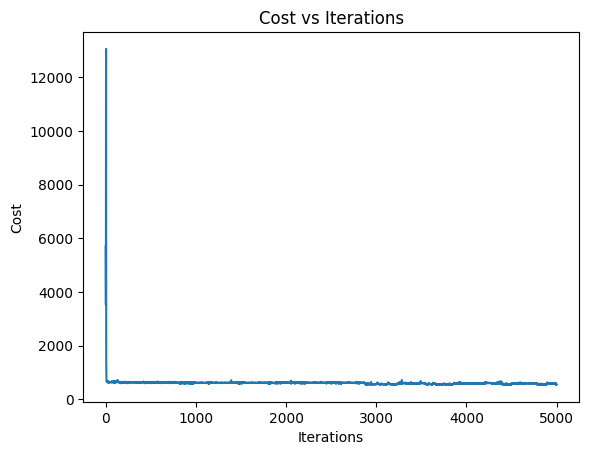

Final Weights: W1: [[  16.99197581   12.94646123]
 [   3.61825628 -116.79106251]
 [ -35.8314856    83.40998481]
 [  47.0968665   178.89867145]], B1: [[ -62.29318428]
 [ -54.47387887]
 [ -67.58124071]
 [-145.65373138]], W12: [[ 43.31888043 -81.19135581  54.99712897  56.39750543]], B2: [[6.68376632]]


In [246]:
# 5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

# Learning Rate 0.001, Epochs 5000
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_low = NeuralNetwork(2, 4, 1)
W1_l,B1_l,W2_l,B2_l = nn_low.train(A0, y, 5000, 0.001)
print(f"Final Weights: W1: {W1_l}, B1: {B1_l}, W12: {W2_l}, B2: {B2_l}")

# Learning Rate 1.0, Epochs 5000
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_high = NeuralNetwork(2, 4, 1)
W1_h,B1_h,W2_h,B2_h = nn_high.train(A0, y, 5000, 1)
print(f"Final Weights: W1: {W1_h}, B1: {B1_h}, W12: {W2_h}, B2: {B2_h}")

Test MSE for low learning rate: 486.3763766069023
Test MSE for high learning rate: 1049.2946131312594


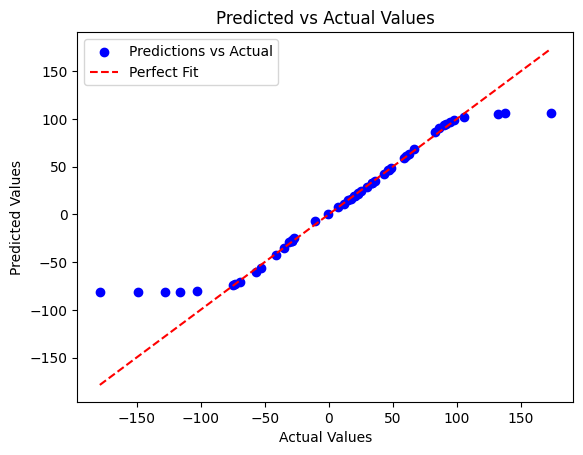

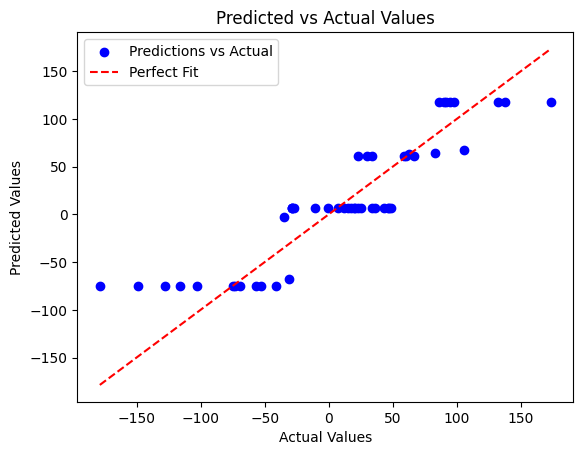

In [247]:
# Comparing accuracies of high and low learning rates
# Load and preprocess X_test and Y_test
X_test = np.loadtxt('X_test.csv').T  # Ensure correct shape
Y_test = np.loadtxt('Y_test.csv').reshape(1, -1)  # Ensure correct shape
# Make predictions
Y_pred_l = predict(X_test, W1_l, B1_l, W2_l, B2_l)
Y_pred_h = predict(X_test, W1_h, B1_h, W2_h, B2_h)

# Compute Mean Squared Error
test_mse_l = mse_cost(Y_test, Y_pred_l)
print(f"Test MSE for low learning rate: {test_mse_l}")
test_mse_h = mse_cost(Y_test, Y_pred_h)
print(f"Test MSE for high learning rate: {test_mse_h}")


import matplotlib.pyplot as plt

plt.scatter(Y_test.flatten(), Y_pred_l.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
plt.close()

plt.scatter(Y_test.flatten(), Y_pred_h.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
plt.close()

Epoch: 0, Cost: 5721.513604623708
Epoch: 1000, Cost: 1047.7328736652862
Epoch: 2000, Cost: 988.6810340268771
Epoch: 3000, Cost: 905.5999188184209
Epoch: 4000, Cost: 923.4408828726062
Final Epoch: 4999, Cost: 965.7809825102242
Final Weights: W1: [[-0.68438189  5.74272158]], B1: [[-1.2638314]], W12: [[157.17054827]], B2: [[-66.85636708]]


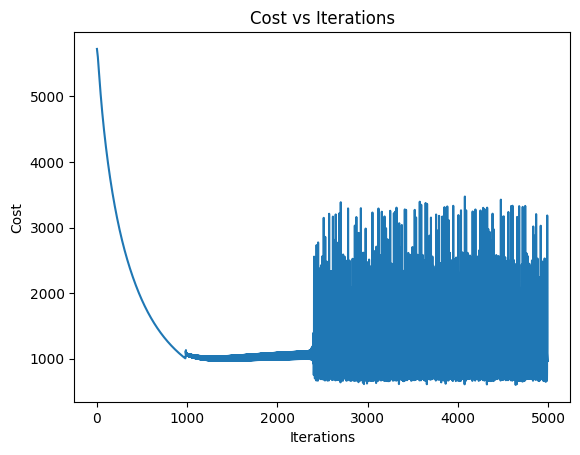

Final Weights: W1: [[-0.68438189  5.74272158]], B1: [[-1.2638314]], W12: [[157.17054827]], B2: [[-66.85636708]]
Epoch: 0, Cost: 5818.480083440265
Epoch: 1000, Cost: 50.58690182467081
Epoch: 2000, Cost: 14.32506122685106
Epoch: 3000, Cost: 7.557570154849845
Epoch: 4000, Cost: 4.741097367376272
Final Epoch: 4999, Cost: 3.261847549355968
Final Weights: W1: [[ 0.02442359  5.71905105]
 [-0.00656824 -3.97773707]
 [ 0.00623438  5.8593198 ]
 [ 0.0064021   4.58974534]
 [ 0.0109852  -4.14389867]], B1: [[  8.77835887]
 [  0.69662808]
 [-10.63372569]
 [ -4.68816813]
 [ -2.97363605]], W12: [[ 52.3662525  -64.11780272  53.60887319  57.26993364 -63.92793955]], B2: [[-7.6898634]]


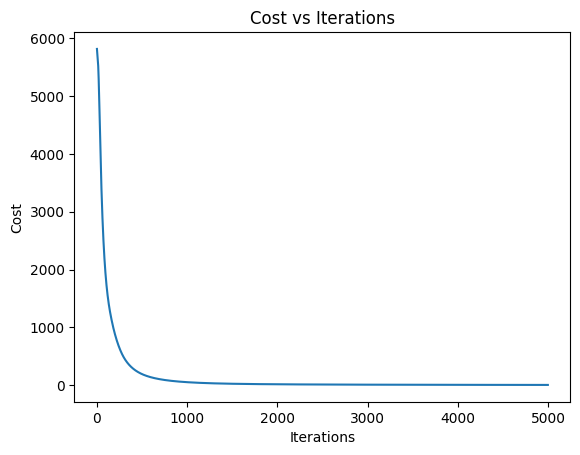

Final Weights: W1: [[ 0.02442359  5.71905105]
 [-0.00656824 -3.97773707]
 [ 0.00623438  5.8593198 ]
 [ 0.0064021   4.58974534]
 [ 0.0109852  -4.14389867]], B1: [[  8.77835887]
 [  0.69662808]
 [-10.63372569]
 [ -4.68816813]
 [ -2.97363605]], W12: [[ 52.3662525  -64.11780272  53.60887319  57.26993364 -63.92793955]], B2: [[-7.6898634]]
Epoch: 0, Cost: 5722.816868981861
Epoch: 1000, Cost: 20.098339650881275
Epoch: 2000, Cost: 6.339203017338594
Epoch: 3000, Cost: 3.010284825894658
Epoch: 4000, Cost: 1.6896630376847421
Final Epoch: 4999, Cost: 1.0655098195675023
Final Weights: W1: [[ 0.05618217  6.26849334]
 [-0.05344746  3.07377455]
 [ 0.04334117  4.09014179]
 [-0.02521557  3.38050161]
 [ 0.03810472  3.68645587]
 [ 0.02324836 -4.2299018 ]
 [-0.01464351  3.59884642]
 [ 0.04828873 -5.51024578]
 [ 0.11054037  3.4201544 ]
 [ 0.01066995 -3.53923393]], B1: [[10.68307274]
 [-3.08679738]
 [ 3.53529554]
 [-4.00780212]
 [-0.58970309]
 [-5.61718232]
 [-1.39158666]
 [10.78578007]
 [-4.12526692]
 [-1.5

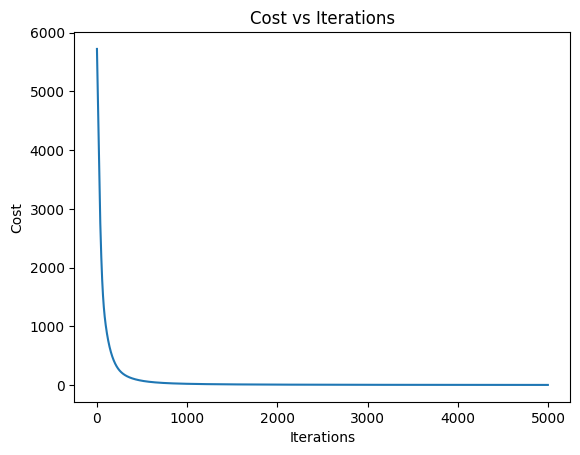

Final Weights: W1: [[ 0.05618217  6.26849334]
 [-0.05344746  3.07377455]
 [ 0.04334117  4.09014179]
 [-0.02521557  3.38050161]
 [ 0.03810472  3.68645587]
 [ 0.02324836 -4.2299018 ]
 [-0.01464351  3.59884642]
 [ 0.04828873 -5.51024578]
 [ 0.11054037  3.4201544 ]
 [ 0.01066995 -3.53923393]], B1: [[10.68307274]
 [-3.08679738]
 [ 3.53529554]
 [-4.00780212]
 [-0.58970309]
 [-5.61718232]
 [-1.39158666]
 [10.78578007]
 [-4.12526692]
 [-1.55940714]], W12: [[ 29.04963413  26.37254484  24.11760705  23.21000253  28.87350658
  -35.84767105  22.4714011  -43.9119202   27.24823615 -44.29581642]], B2: [[-17.62633919]]


In [250]:
# Learning Rate 0.001, Epochs 5000
# 1 Neuron in hidden layer
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_1 = NeuralNetwork(2, 1, 1)
W1_1,B1_1,W2_1,B2_1 = nn_1.train(A0, y, 5000, 0.01)
print(f"Final Weights: W1: {W1_1}, B1: {B1_1}, W12: {W2_1}, B2: {B2_1}")

# 5 Neurons in hidden layer
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_5 = NeuralNetwork(2, 5, 1)
W1_5,B1_5,W2_5,B2_5 = nn_5.train(A0, y, 5000, 0.01)
print(f"Final Weights: W1: {W1_5}, B1: {B1_5}, W12: {W2_5}, B2: {B2_5}")

# 10 Neurons in hidden layer
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_10 = NeuralNetwork(2, 10, 1)
W1_10,B1_10,W2_10,B2_10 = nn_10.train(A0, y,5000,0.01)
print(f"Final Weights: W1: {W1_10}, B1: {B1_10}, W12: {W2_10}, B2: {B2_10}")


Test MSE for 1 neuron: 1251.0536863657333
Test MSE for 5 neurons: 49.37849251906813
Test MSE for 10 neurons: 33.39841843846018


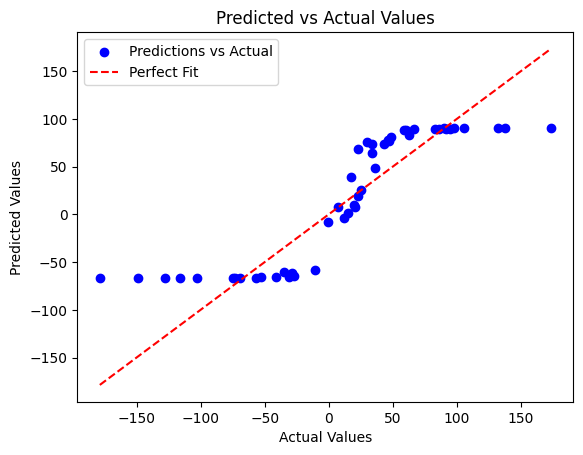

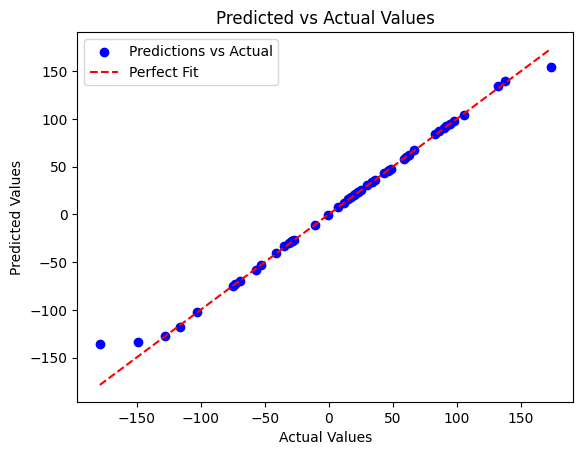

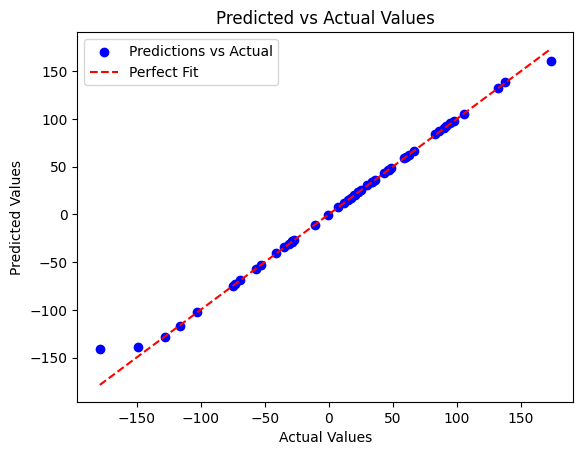

In [252]:
# Load and preprocess X_test and Y_test
X_test = np.loadtxt('X_test.csv').T  # Ensure correct shape
Y_test = np.loadtxt('Y_test.csv').reshape(1, -1)  # Ensure correct shape
# Make predictions
Y_pred_1 = predict(X_test, W1_1, B1_1, W2_1, B2_1)
Y_pred_5 = predict(X_test, W1_5, B1_5, W2_5, B2_5)
Y_pred_10 = predict(X_test, W1_10, B1_10, W2_10, B2_10)

# Compute Mean Squared Error
test_mse_1 = mse_cost(Y_test, Y_pred_1)
print(f"Test MSE for 1 neuron: {test_mse_1}")
test_mse_5 = mse_cost(Y_test, Y_pred_5)
print(f"Test MSE for 5 neurons: {test_mse_5}")
test_mse_10 = mse_cost(Y_test, Y_pred_10)
print(f"Test MSE for 10 neurons: {test_mse_10}")

plt.scatter(Y_test.flatten(), Y_pred_1.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
plt.close()

import matplotlib.pyplot as plt

plt.scatter(Y_test.flatten(), Y_pred_5.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
plt.close()

import matplotlib.pyplot as plt

plt.scatter(Y_test.flatten(), Y_pred_10.flatten(), color='blue', label='Predictions vs Actual')
plt.plot([min(Y_test.flatten()), max(Y_test.flatten())],
         [min(Y_test.flatten()), max(Y_test.flatten())], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values")
plt.show()
plt.close()

In [261]:
# Relu Neural Network
import numpy as np
class NeuralNetworkReLU:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(hidden_size, input_size)
        self.B1 = np.random.randn(hidden_size, 1)
        self.W2 = np.random.randn(output_size, hidden_size)
        self.B2 = np.random.randn(output_size, 1)
        self.cost_history = []

    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
          y_hat, Z2, A1 = self.feed_forward(X)
          cost = self.mse_cost(y, y_hat)
          self.cost_history.append(cost)
          dW1, dB1, dW2, dB2 = self.back_propagation( X, y_hat,y, Z2, A1)
          self.W1 -= learning_rate * dW1
          self.B1 -= learning_rate * dB1
          self.W2 -= learning_rate * dW2
          self.B2 -= learning_rate * dB2
          if i % 1000 == 0:
            print(f"Epoch: {i}, Cost: {cost}")
          elif i == epochs - 1:
            print(f"Final Epoch: {i}, Cost: {cost}")

        print(f"Final Weights: W1: {self.W1}, B1: {self.B1}, W12: {self.W2}, B2: {self.B2}")
        plt.plot(self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()
        plt.close()
        return self.W1, self.B1, self.W2, self.B2
    def feed_forward(self,A0):
        # Input Layer to Hidden Layer Calculations
        Z1 = self.W1 @ A0 + self.B1
        A1 = self.relu(Z1)

        # Hidden Layer to Output Layer Calculations
        Z2 = self.W2 @ A1 + self.B2
        # A2 = relu(Z2)
        A2 = Z2
        y_hat = A2
        return y_hat, Z2, A1

    def mse_cost(self,y, y_hat):
        return np.mean((y_hat - y)**2)

    def sigmoid(self,arr):
        return 1 / (1+np.exp(-1 * arr))

    def sigmoid_derivative(self,x):
        return x * (1 - x)

    def relu(self,arr):
        return np.maximum(0, arr)

    def relu_derivative(self,x):
        return (x > 0).astype(float)


    def back_propagation(self, X, y_hat,y, Z2, A1):
        dZ2 = y_hat - y
        dW2 = dZ2 @ A1.T
        dB2 = np.sum(dZ2, axis=1, keepdims=True)

        dA1 = self.W2.T @ dZ2
        dZ1 = dA1 * self.relu_derivative(Z1)
        dW1 = dZ1 @ X.T
        dB1 = np.sum(dZ1, axis=1, keepdims=True)

        return dW1, dB1, dW2, dB2


Epoch: 0, Cost: 5911.753162906907
Epoch: 1000, Cost: nan
Epoch: 2000, Cost: nan


<ipython-input-261-b5cd65dcd972>:47: RuntimeWarning: overflow encountered in square
  return np.mean((y_hat - y)**2)
<ipython-input-261-b5cd65dcd972>:67: RuntimeWarning: overflow encountered in matmul
  dA1 = self.W2.T @ dZ2
<ipython-input-261-b5cd65dcd972>:68: RuntimeWarning: invalid value encountered in multiply
  dZ1 = dA1 * self.relu_derivative(Z1)


Epoch: 3000, Cost: nan
Epoch: 4000, Cost: nan
Final Epoch: 4999, Cost: nan
Final Weights: W1: [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]], B1: [[nan]
 [nan]
 [nan]
 [nan]], W12: [[nan nan nan nan]], B2: [[nan]]


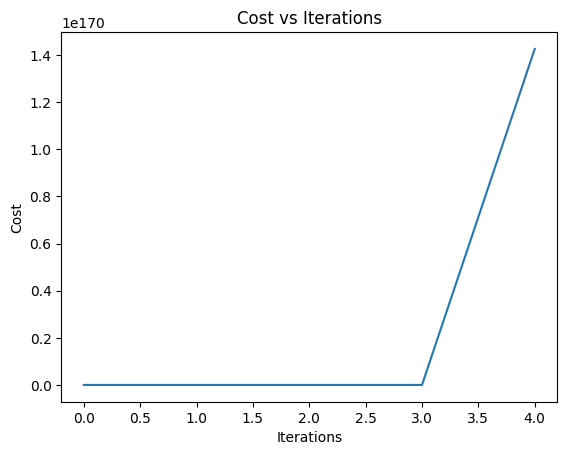

Final Weights: W1: [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]], B1: [[nan]
 [nan]
 [nan]
 [nan]], W12: [[nan nan nan nan]], B2: [[nan]]


In [262]:
# Learning Rate 0.01, Epochs 5000
X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_relu = NeuralNetworkReLU(2, 4, 1)
W1,B1,W2,B2 = nn_relu.train(A0, y, 5000, 0.01)
print(f"Final Weights: W1: {W1}, B1: {B1}, W12: {W2}, B2: {B2}")

X_test = np.loadtxt('X_test.csv')
X_test = X_test.T
y_test = np.loadtxt('Y_test.csv')
y_test = y_test.reshape(1, -1)

Epoch: 0, Cost: 5725.845596741728
Epoch: 1000, Cost: 94.65661633280183
Epoch: 2000, Cost: 29.803238431207582
Epoch: 3000, Cost: 16.963768548971522
Epoch: 4000, Cost: 11.799216059328957
Final Epoch: 4999, Cost: 14.70133476328243
Final Weights: W1: [[ 0.03823333  4.25843799]
 [-0.01009439  4.83041903]
 [-0.01232163  4.30490681]
 [ 0.0071017  -3.93018572]], B1: [[ 1.84216376]
 [ 6.39648435]
 [-1.953354  ]
 [ 5.84319716]], W12: [[ 63.34815093  64.56428393  62.29739924 -93.5130134 ]], B2: [[-33.31459871]]


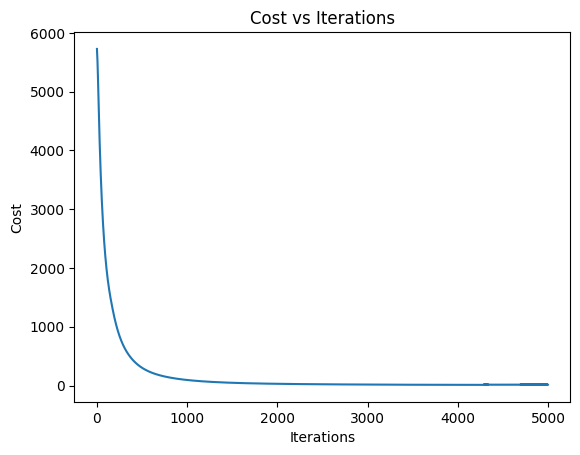

Final Weights: W1: [[ 0.03823333  4.25843799]
 [-0.01009439  4.83041903]
 [-0.01232163  4.30490681]
 [ 0.0071017  -3.93018572]], B1: [[ 1.84216376]
 [ 6.39648435]
 [-1.953354  ]
 [ 5.84319716]], W12: [[ 63.34815093  64.56428393  62.29739924 -93.5130134 ]], B2: [[-33.31459871]]


In [281]:
# L2 Regularization

class NeuralNetworkL2(NeuralNetwork):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__(input_size, hidden_size, output_size)

    def train(self, X, y, epochs, learning_rate, lambda2):
        for i in range(epochs):
          y_hat, Z2, A1 = self.feed_forward(X)
          # L2 Loss
          cost = self.mse_loss_with_l2(y_hat, y, self.W1, self.W2, lambda2)
          self.cost_history.append(cost)
          dW1, dB1, dW2, dB2 = self.back_propagation( X, y_hat,y, Z2, A1)
          self.W1 -= learning_rate * dW1
          self.B1 -= learning_rate * dB1
          self.W2 -= learning_rate * dW2
          self.B2 -= learning_rate * dB2
          if i % 1000 == 0:
            print(f"Epoch: {i}, Cost: {cost}")
          elif i == epochs - 1:
            print(f"Final Epoch: {i}, Cost: {cost}")

        print(f"Final Weights: W1: {self.W1}, B1: {self.B1}, W12: {self.W2}, B2: {self.B2}")
        plt.plot(self.cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs Iterations')
        plt.show()
        plt.close()
        return self.W1, self.B1, self.W2, self.B2

X_train = np.loadtxt('X_train.csv')
y_train = np.loadtxt('Y_train.csv')
A0 = X_train.T
y = y_train.reshape(1, -1)
nn_L2 = NeuralNetworkL2(2, 4, 1)
W1,B1,W2,B2 = nn_L2.train(A0, y, 5000, 0.01, 0.0001)
print(f"Final Weights: W1: {W1}, B1: {B1}, W12: {W2}, B2: {B2}")

X_test = np.loadtxt('X_test.csv')
X_test = X_test.T
y_test = np.loadtxt('Y_test.csv')
y_test = y_test.reshape(1, -1)

# Answers

Answer the following ques􏰀ons:
1. What is the activation function that you will choose for the output layer? Justify your answer briefly.
<br>
Linear activation because it lets me output any value without restraints. For a simple network like this with only 2 features, and applying for a regression task, I beleived this was the best to output a continous value.

2. How many neurons should there be in the output layer? Why?
<br>
One, this is because the target value file is just one column of values. Indicating that the inputs output one single value.
3. Report on the average MSE loss.
The average MSE loss was very good, after 10000 iterations, the weights were able to converge.
4. Plot the loss as a function of the number of iterations.
5. What is the effect of the learning rate on the training process? Vary the learning rate to be
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

The learning rate plays a significant part in performance and how well the gradients move up and down. The higher learning rate performed much worse, like due to overshooting the minimum. The lower learning rate did well, but didn't perform as well as a high learning rate such as 0.01. This shows that 0.001 is too slow for the model to find the minimum in the same number of epochs.

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you
will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to
be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and ploting the true labels and your
predicted labels, along with a brief (2-3 lines) description.

The number of neurons affect how much a model will learn. Less neurons means the model won't be able to capture complex patterns. Too many neurons leads to overfitting of the training data.

The first set of neurons I used was 4 because it was 2 times the number of features. In the above, I also show the network for 1, 5, and 10 neurons. The update rule won't need to be changed because the gradients are computed based on the chain rule of calculus, which is independent of the size of the weight matrices. Although adding neurons change the dimensions of the weight matrices, the update rule won't be affected.

The resulting loss graphs and comparison with true and predicted labels for the different number of neurons stayed mostly true to the norm. The 1 neuron performed significanly worse than the other two with an MSE of 1250, while 5 neurons had 49, and 10 neurons had 33. One neuron is clearly not enough for the input features, and picking between using 5 or more neurons will depend more on computational costs and resources because their mse were very similar, and the accuracy were also very good.


7. What is the effect of the activation functions in the network? Explore two different activation
func􏰀tins other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observa􏰀ons by repor􏰀ng the final loss and ploting the true labels and your
predicted labels, along with a brief (2-3 lines) descrip􏰀on.

Different activations are used for different kinds of classifcaiton and patterns. I used ReLU and linear. It won't change the update rule specifcally because that formula doesn't look at the formulas but focuses on the relationships in the chain multiplications. However, to get those chained values, different derivations are needed, for example the ReLU derivatin is different from sigmoid, and linear's derivation is just 1.


8. Split the training data into training and validation set and apply early stopping criteria.
a. How the training and validation loss changes as you change the “patience” in Early Stopping?
b. Plot the training vs. validation loss curves. Justify whether your model overfits or underfits as the patience changes.
9. Implement another regularization technique for NN as shown in the class. Compare and contrast with early stopping and your chosen regulariza􏰀on technique.

I used L2 regularization which ddds a penalty proportional to the square of the weights to the loss function. It encourages the model to learn smaller weights, which can improve generalization and reduce overfitting. The MSE after 5000 iterations was 14, which is very good but not the best. Without the L2, the current model got 5 at its lowest. Howver considering I didn't keep same intialized weights each time, the results may be different. But because of how small the differences are, it can be infered L2 is an effective tool for more neurons.